In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sklearn.datasets import fetch_openml
from pangolin import *
from matplotlib import pyplot as plt

In [2]:
# load data
pima = fetch_openml(name="Pima-Indians-Diabetes", version=1, parser="auto")
X = np.array(pima.data)
y_obs = np.array(pima.target).astype(int)

In [3]:
# define model
w = vmap(normal,None,axis_size=X.shape[1])(0,1)
y = vmap(bernoulli_logit, 0)(X @ w)

engine='numpyro'


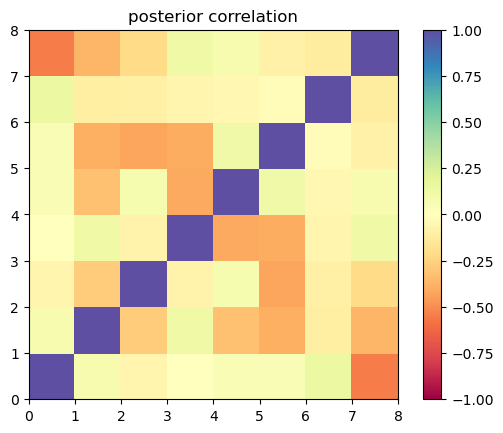

engine='jags'


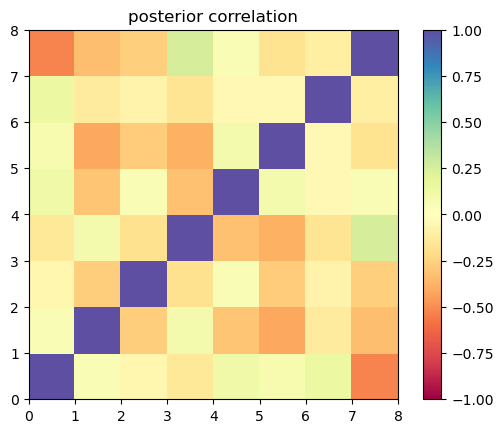

16:40:26 - cmdstanpy - INFO - CmdStan start processing
16:40:26 - cmdstanpy - INFO - Chain [1] start processing
16:40:37 - cmdstanpy - INFO - Chain [1] done processing


engine='stan'


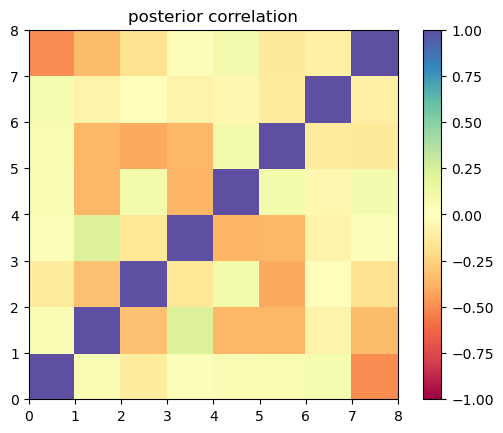

In [4]:
for engine in ["numpyro","jags","stan"]:
    # do inference
    calc = Calculate(engine,niter=1000)
    ws = calc.sample(w, y, y_obs)
    # plot corr matrix
    print(f"{engine=}")
    C = np.corrcoef(ws.T)
    plt.pcolor(C,cmap="Spectral")
    plt.clim([-1,1])
    plt.gca().set_aspect("equal")
    plt.title("posterior correlation")
    plt.colorbar()
    plt.show()